# Solving Regression Problem using ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# seperating the dependent and the independent data

In [5]:
X = housing.data

In [6]:
y = housing.target

In [7]:
X = pd.DataFrame(X,columns = housing.feature_names)

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y = pd.DataFrame(y,columns=['testing'])

In [10]:
y.head()

,testing
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [12]:
X.shape

(20640, 8)

In [13]:
# so we have 20640 rows and 8 columns

In [14]:
# creating the training , testing and the validation set
x_train_full , x_test , y_train_full, ytest = train_test_split(X,y,random_state=42)

In [16]:
x_train_full.shape

(15480, 8)

In [17]:
# validation set
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,random_state=40)

In [18]:
x_train.shape

(11610, 8)

In [19]:
x_valid.shape

(3870, 8)

In [20]:
model= tf.keras.models.Sequential()

In [22]:
model.add(tf.keras.layers.Dense(35,activation='relu',input_shape=[8]))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [23]:
model.compile(loss='mse',optimizer='sgd')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35)                315       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 736
Trainable params: 736
Non-trainable params: 0
_________________________________________________________________


In [27]:
8*35+35+35*10+10+10*5+5+5+1

736

In [28]:
scaler = StandardScaler()

In [29]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [30]:
history = model.fit(x_train,y_train,epochs=25,validation_data = (x_valid,y_valid))

Epoch 1/25
363/363 [==============================] - 0s 1ms/step - loss: 0.8057 - val_loss: 0.5780
Epoch 2/25
363/363 [==============================] - 0s 640us/step - loss: 0.4963 - val_loss: 0.4913
Epoch 3/25
363/363 [==============================] - 0s 621us/step - loss: 0.4494 - val_loss: 0.4586
Epoch 4/25
363/363 [==============================] - 0s 613us/step - loss: 0.4282 - val_loss: 0.4422
Epoch 5/25
363/363 [==============================] - 0s 605us/step - loss: 0.4151 - val_loss: 0.4315
Epoch 6/25
363/363 [==============================] - 0s 596us/step - loss: 0.4081 - val_loss: 0.4265
Epoch 7/25
363/363 [==============================] - 0s 629us/step - loss: 0.3979 - val_loss: 0.4199
Epoch 8/25
363/363 [==============================] - 0s 623us/step - loss: 0.3924 - val_loss: 0.4115
Epoch 9/25
363/363 [==============================] - 0s 736us/step - loss: 0.3851 - val_loss: 0.4086
Epoch 10/25
363/363 [==============================] - 0s 685us/step - loss: 0.3788 

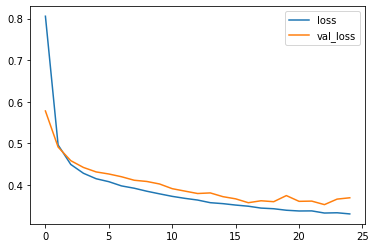

In [31]:
# plotting 
pd.DataFrame(history.history).plot()

In [32]:
# let's see using callbacks

In [34]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model_regression.h5",save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5,restore_best_weights=True)
callbacks = [tensorboard_cb,checkpoint_cb,early_stopping_cb]

In [35]:
model2= tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(35,activation='relu',input_shape=[8]))
model2.add(tf.keras.layers.Dense(10,activation='relu'))
model2.add(tf.keras.layers.Dense(5,activation='relu'))
model2.add(tf.keras.layers.Dense(1))

In [36]:
optimizer = tf.keras
model2.compile(loss='mse',optimizer='adam')
history2 = model2.fit(x_train,y_train,epochs=100,validation_data = (x_valid,y_valid),callbacks = callbacks)

Epoch 1/100
  1/363 [..............................] - ETA: 0s - loss: 7.1820WARNING:tensorflow:From E:\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 3ms/step - loss: 1.7593 - val_loss: 0.6705
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5385 - val_loss: 0.5036
Epoch 3/100
363/363 [==============================] - 0s 931us/step - loss: 0.4427 - val_loss: 0.4443
Epoch 4/100
363/363 [==============================] - 0s 907us/step - loss: 0.4046 - val_loss: 0.4173
Epoch 5/100
363/363 [==============================] - 0s 904us/step - loss: 0.3863 - val_loss: 0.3944
Epoch 6/100
363/363 [==============================] - 0s 918us/step - loss: 0.3704 - val_loss: 0.3831
Epoch 7/100
363/363 [==============================